In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
import re

In [2]:
df = pd.read_csv('../Data/smartwatches.csv')
df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
# train_df = df.sample(frac=0.8, random_state=42)
# test_df = df.drop(train_df.index)
# train_df.reset_index(inplace=True)
# test_df.reset_index(inplace=True)

In [5]:
train_df = df

In [6]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [7]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
# train_df.drop('index', axis=1, inplace=True)
# train_df.head()

In [9]:
train_df[train_df['Display Size'].isna()]

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
12,noise,3799.0,7999.0,52.506563,3.8,545.0,Wrb-sw-colorfitpro4alpha-std-blk_blk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
13,noise,3499.0,5999.0,41.673612,3.8,281.0,Wrb-sw-force-std-blk_blk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
23,boat,2499.0,7990.0,68.723404,4.2,71481.0,8.90E+12,NaN,NaN,Silicon,Yes,8.0,Yes,NaN,50 - 75 g
28,boat,2599.0,7990.0,67.471840,4.2,71481.0,8.90E+12,NaN,NaN,Silicon,Yes,8.0,Yes,NaN,75g +
29,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
30,boat,1999.0,7990.0,74.981227,3.6,827.0,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,75g +
47,samsung,11999.0,30990.0,61.281058,4.1,72.0,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,35 - 50 g
51,samsung,18000.0,34999.0,48.569959,4.3,5228.0,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,75g +
53,garmin,27990.0,36490.0,23.294053,4.5,4339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<= 20 g


In [10]:
# [val for val in train_df['Display Size'] if train_df['Display Size']]

<AxesSubplot: xlabel='Current Price', ylabel='Density'>

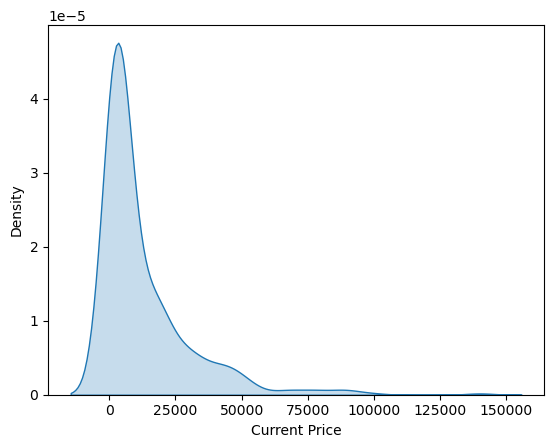

In [11]:
sns.kdeplot(data=train_df['Current Price'], fill=True)

In [12]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaled_feature = scaler.fit_transform(train_df[['Current Price']])
# Convert back to DataFrame
imputed_feature_df = pd.DataFrame(scaled_feature, columns=['scaled_nan_value'])

In [15]:
imputed_feature_df.isna()

,scaled_nan_value
0,False
1,False
2,False
3,False
4,False
...,...
445,False
446,False
447,False
448,False


<AxesSubplot: xlabel='scaled_nan_value', ylabel='Density'>

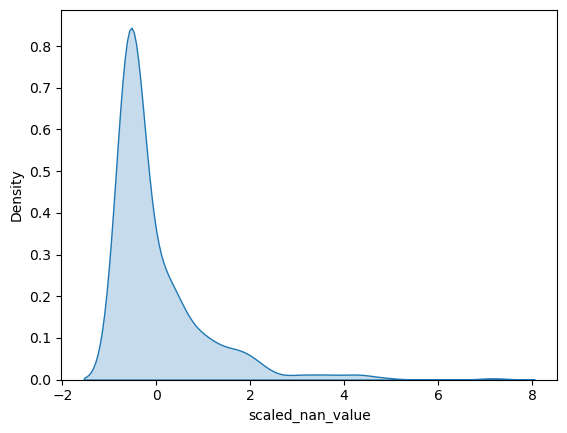

In [16]:
sns.kdeplot(data=imputed_feature_df['scaled_nan_value'], fill=True)

In [17]:
imputed_feature_df[imputed_feature_df['scaled_nan_value'].isna()]

,scaled_nan_value
49,NaN
54,NaN
56,NaN
58,NaN
69,NaN
71,NaN
92,NaN
107,NaN
180,NaN
231,NaN


In [18]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors = 3)
# Fit and transform the scaled feature
imputed_feature = imputer.fit_transform(scaled_feature)

In [19]:
# Convert the imputed feature back to the original scale
original_scale_feature = scaler.inverse_transform(imputed_feature)

In [20]:
# Convert back to DataFrame
dataframe = pd.DataFrame(original_scale_feature, columns=['Scaled_Current_Price'])

In [21]:
dataframe

,Scaled_Current_Price
0,82990.0
1,3799.0
2,1999.0
3,1799.0
4,1599.0
...,...
445,5999.0
446,3700.0
447,5999.0
448,3200.0


In [22]:
dataframe['Scaled_Current_Price'][16]

1799.0

In [23]:
dataframe['Scaled_Current_Price'][51]

18000.0

In [24]:
train_df['Current Price'].median()

3999.0

In [25]:
train_df = pd.concat([train_df, dataframe], axis=1)

In [26]:
train_df

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Scaled_Current_Price
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g,82990.0
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g,3799.0
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g,1999.0
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +,1799.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g,1599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,Yes,22.0,Yes,1.3 inches,NaN,5999.0
446,fire-boltt,3700.0,9999.0,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,Yes,8.0,Yes,0.1 inches,NaN,3700.0
447,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,Yes,22.0,Yes,1.3 inches,NaN,5999.0
448,fire-boltt,3200.0,7999.0,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,Yes,22.0,Yes,0.1 inches,NaN,3200.0


In [27]:
# Applying log transformation

# Transformation for Skewed Data

<AxesSubplot: xlabel='Scaled_Current_Price', ylabel='Density'>

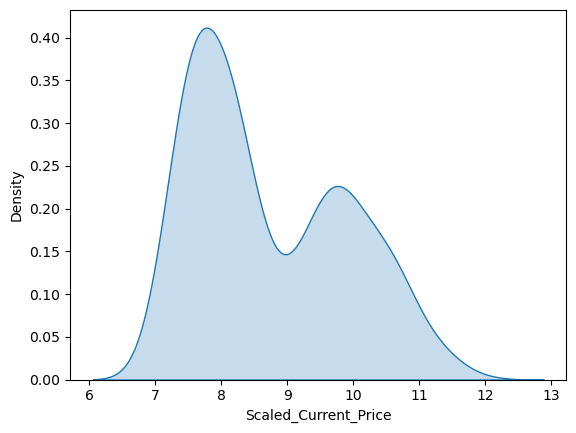

In [28]:
# Log Transformation
sns.kdeplot(data=np.log(train_df['Scaled_Current_Price']), fill=True)

<AxesSubplot: xlabel='Scaled_Current_Price', ylabel='Density'>

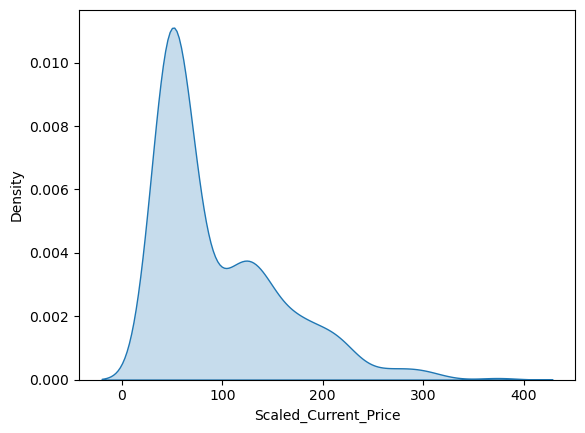

In [29]:
# SQRT Transformation
sns.kdeplot(data=(np.sqrt(train_df['Scaled_Current_Price'])), fill=True)

<AxesSubplot: xlabel='Scaled_Current_Price', ylabel='Density'>

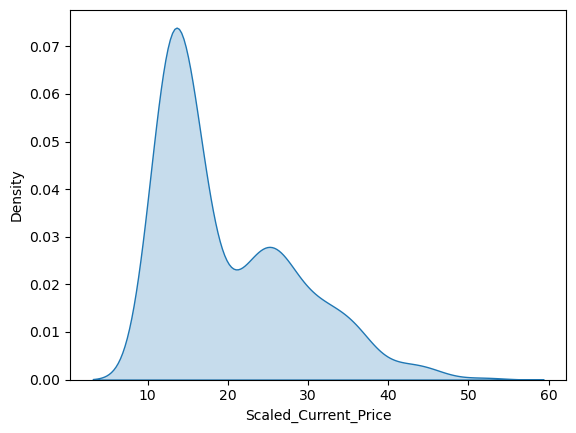

In [30]:
# Cube Root Transformation
sns.kdeplot(data=(np.cbrt(train_df['Scaled_Current_Price'])), fill=True)

/tmp/ipykernel_5694/925691110.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=(stats.boxcox(train_df['Scaled_Current_Price'])), fill=True)


<AxesSubplot: ylabel='Density'>

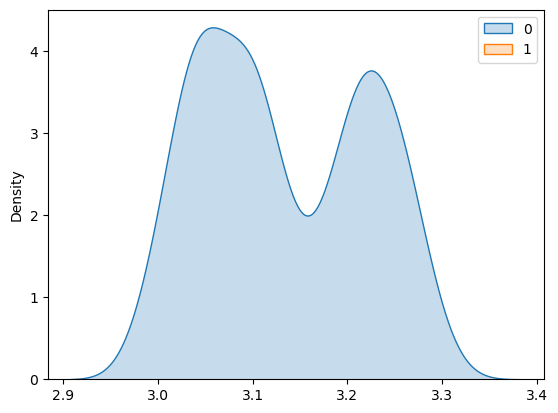

In [31]:
# Box-Cox Transformation
from scipy import stats
sns.kdeplot(data=(stats.boxcox(train_df['Scaled_Current_Price'])), fill=True)

<AxesSubplot: ylabel='Density'>

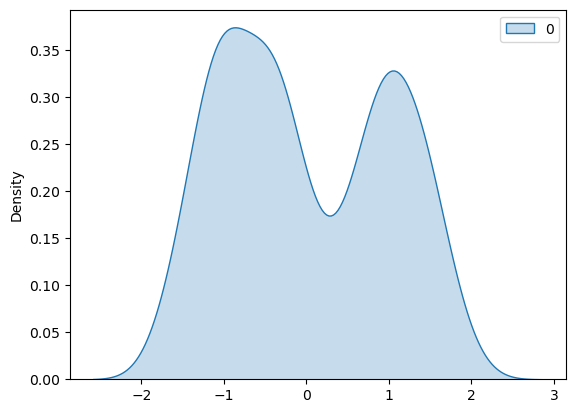

In [32]:
# Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer
# Initialize Yeo-Johnson Transformer
transformer = PowerTransformer(method='yeo-johnson')

sns.kdeplot(data=(transformer.fit_transform(train_df[['Scaled_Current_Price']])), fill=True)

#  Handle Display Size Feature

In [33]:
train_df['Display Size'].value_counts().count()

40

In [34]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)

In [35]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [36]:
train_df['Display Size']

0      0.0
1      1.8
2      1.7
3      1.8
4      1.7
      ... 
445    1.3
446    0.1
447    1.3
448    0.1
449    0.1
Name: Display Size, Length: 450, dtype: float64

In [37]:
train_df

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Scaled_Current_Price
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,0.0,35 - 50 g,82990.0
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,50 - 75 g,3799.0
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,35 - 50 g,1999.0
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75g +,1799.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,35 - 50 g,1599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,Yes,22.0,Yes,1.3,NaN,5999.0
446,fire-boltt,3700.0,9999.0,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,Yes,8.0,Yes,0.1,NaN,3700.0
447,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,Yes,22.0,Yes,1.3,NaN,5999.0
448,fire-boltt,3200.0,7999.0,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,Yes,22.0,Yes,0.1,NaN,3200.0


In [38]:
train_df['Display Size'].replace(0.0, np.nan, inplace=True)

In [39]:
train_df['Display Size'].isna().sum()

31

# Handle Weight Feature

In [40]:
train_df['Weight'].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [41]:
train_df['Weight'].replace('20 - 35 g', sum([int(i) for i in re.findall('\d+', '20 - 35 g')])/2, inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_5694/1477112493.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_df['Weight'].replace('20 - 35 g', sum([int(i) for i in re.findall('\d+', '20 - 35 g')])/2, inplace=True)


In [42]:
train_df['Weight'].value_counts()

Weight
27.5         80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [43]:
train_df['Weight'].replace('35 - 50 g', sum([int(i) for i in re.findall('\d+', '35 - 50 g')])/2, inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_5694/1614971131.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_df['Weight'].replace('35 - 50 g', sum([int(i) for i in re.findall('\d+', '35 - 50 g')])/2, inplace=True)


In [44]:
train_df['Weight'].replace('50 - 75 g', sum([int(i) for i in re.findall('\d+', '50 - 75 g')])/2, inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_5694/3979772657.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_df['Weight'].replace('50 - 75 g', sum([int(i) for i in re.findall('\d+', '50 - 75 g')])/2, inplace=True)


In [45]:
train_df['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_5694/3271034506.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_df['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)


In [46]:
train_df['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_5694/1289372860.py:1: SyntaxWarning: invalid escape sequence '\d'
  train_df['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 450 non-null    object 
 1   Current Price         440 non-null    float64
 2   Original Price        377 non-null    float64
 3   Discount Percentage   377 non-null    float64
 4   Rating                444 non-null    float64
 5   Number OF Ratings     391 non-null    float64
 6   Model Name            415 non-null    object 
 7   Dial Shape            327 non-null    object 
 8   Strap Color           327 non-null    object 
 9   Strap Material        381 non-null    object 
 10  Touchscreen           413 non-null    object 
 11  Battery Life (Days)   418 non-null    float64
 12  Bluetooth             444 non-null    object 
 13  Display Size          419 non-null    float64
 14  Weight                264 non-null    float64
 15  Scaled_Current_Price  4

In [48]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Scaled_Current_Price
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,42.5,82990.0
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,62.5,3799.0
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,42.5,1999.0
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75.0,1799.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5,1599.0


# Current Price,  Original Price and Discount Percentage is related to eachother and we have apply feature engineering and Discount Percentage has in different unit also

In [49]:
train_df['Discount Price'] = train_df['Original Price'] * (-train_df['Discount Percentage'])/100

In [50]:
train_df

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Scaled_Current_Price,Discount Price
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,42.5,82990.0,-6910.000000
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,62.5,3799.0,-13200.000001
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,42.5,1999.0,-5991.000000
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75.0,1799.0,-18200.000000
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5,1599.0,-3400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,Yes,22.0,Yes,1.3,NaN,5999.0,-3000.000000
446,fire-boltt,3700.0,9999.0,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,Yes,8.0,Yes,0.1,NaN,3700.0,-6299.000000
447,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,Yes,22.0,Yes,1.3,NaN,5999.0,-3000.000000
448,fire-boltt,3200.0,7999.0,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,Yes,22.0,Yes,0.1,NaN,3200.0,-4799.000000


In [51]:
train_df.drop('Discount Percentage', axis=1, inplace=True)

In [52]:
numerical_cols = [col for col in train_df.columns if train_df[col].dtype == 'float']

In [53]:
train_df[numerical_cols]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Scaled_Current_Price,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,82990.0,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,3799.0,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,1999.0,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,1799.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,1599.0,-3400.000000
...,...,...,...,...,...,...,...,...,...
445,5999.0,8999.0,2.5,NaN,22.0,1.3,NaN,5999.0,-3000.000000
446,3700.0,9999.0,NaN,NaN,8.0,0.1,NaN,3700.0,-6299.000000
447,5999.0,8999.0,2.5,NaN,22.0,1.3,NaN,5999.0,-3000.000000
448,3200.0,7999.0,NaN,NaN,22.0,0.1,NaN,3200.0,-4799.000000


IndexError: index 2 is out of bounds for axis 0 with size 2

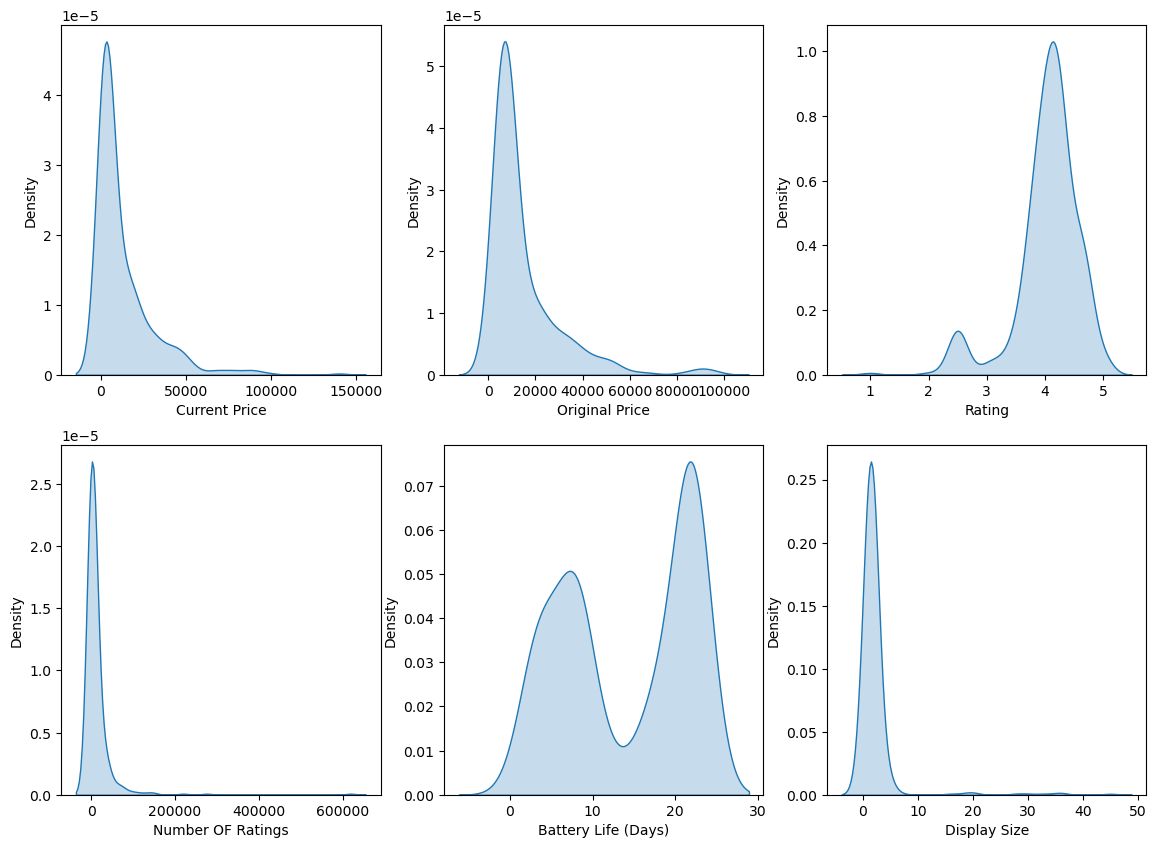

In [54]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(14,10))

for i, colum in enumerate(numerical_cols):
    # print(i, col)
    row = i // 3
    col = i % 3
    # print("Row:", row, "Col: ", col)
    ax = axis[row, col]
    # print(ax)
    sns.kdeplot(data=train_df[colum],  ax=ax, fill=True)
plt.show()

# Remove Outliers

In [55]:
train_df[numerical_cols]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Scaled_Current_Price,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,82990.0,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,3799.0,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,1999.0,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,1799.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,1599.0,-3400.000000
...,...,...,...,...,...,...,...,...,...
445,5999.0,8999.0,2.5,NaN,22.0,1.3,NaN,5999.0,-3000.000000
446,3700.0,9999.0,NaN,NaN,8.0,0.1,NaN,3700.0,-6299.000000
447,5999.0,8999.0,2.5,NaN,22.0,1.3,NaN,5999.0,-3000.000000
448,3200.0,7999.0,NaN,NaN,22.0,0.1,NaN,3200.0,-4799.000000


IndexError: index 2 is out of bounds for axis 0 with size 2

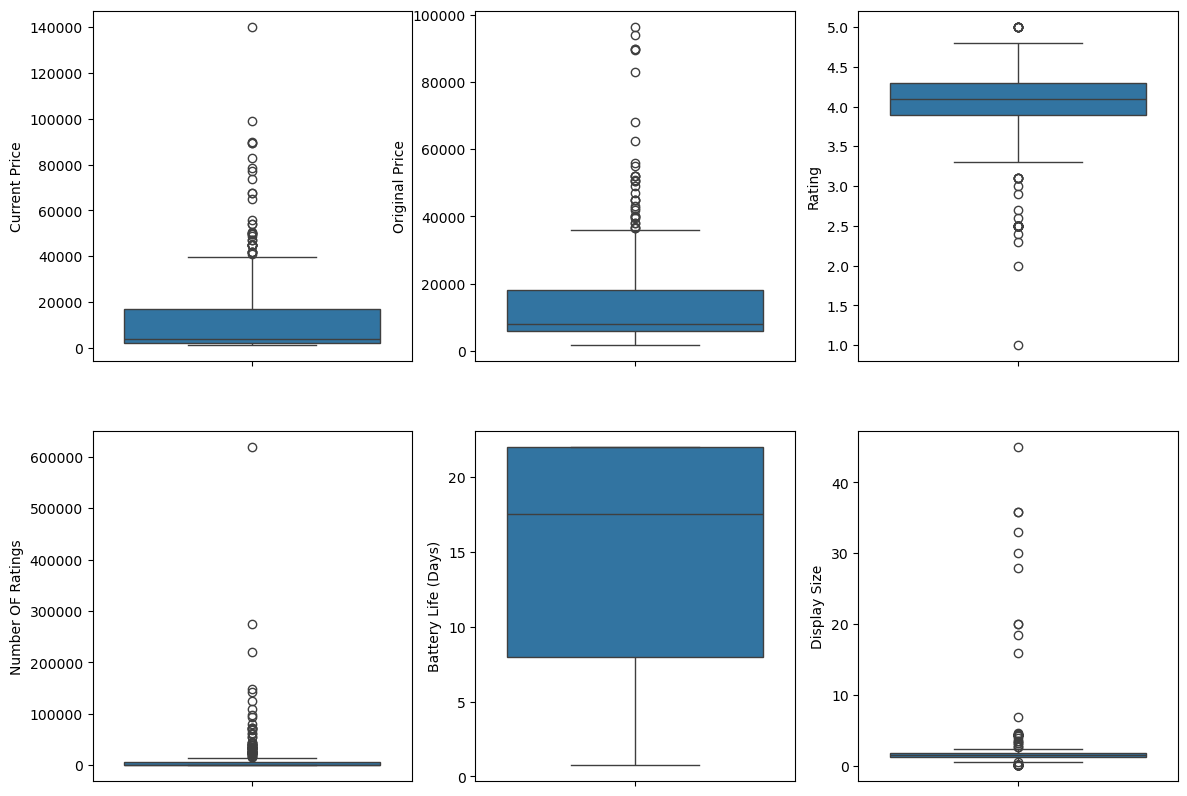

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,10))

for i, colum in enumerate(numerical_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(data=train_df[colum], ax=ax)
plt.show()

In [ ]:
train_df.shape

In [57]:
# Remove Outliers
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

In [58]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Scaled_Current_Price', 'Discount Price'],
      dtype='object')

In [59]:
import_cols = ['Current Price', 'Original Price', 'Rating', 'Number OF Ratings', 'Display Size']

In [60]:
for col in import_cols:
    train_df = remove_outliers(train_df, col)

In [61]:
train_df.shape

(181, 16)

IndexError: index 2 is out of bounds for axis 0 with size 2

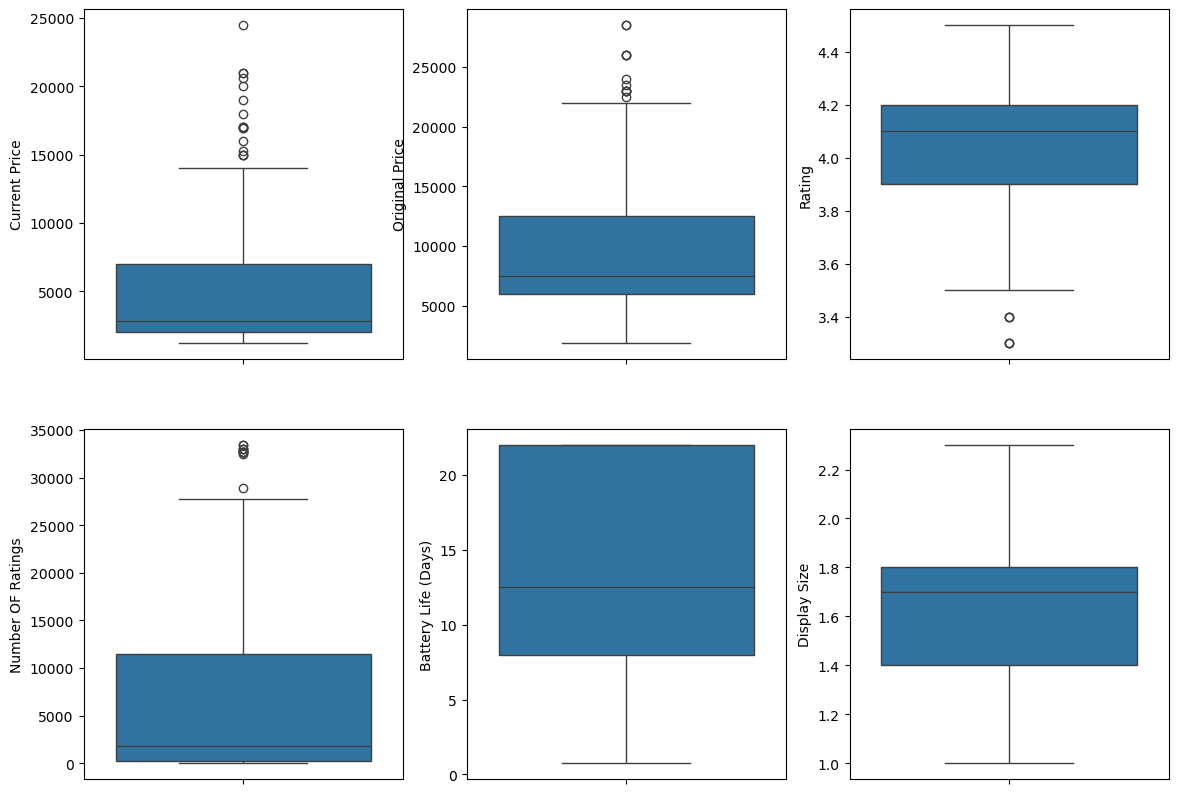

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,10))

for i, colum in enumerate(numerical_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(data=train_df[colum], ax=ax)
plt.show()

In [ ]:
for col in numerical_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)

In [63]:
train_df[numerical_cols].isna().sum()

Current Price            0
Original Price           0
Rating                   0
Number OF Ratings        0
Battery Life (Days)     10
Display Size             0
Weight                  64
Scaled_Current_Price     0
Discount Price           0
dtype: int64

In [64]:
train_df.isna().sum()

Brand                    0
Current Price            0
Original Price           0
Rating                   0
Number OF Ratings        0
Model Name               9
Dial Shape              65
Strap Color             65
Strap Material          26
Touchscreen              6
Battery Life (Days)     10
Bluetooth                0
Display Size             0
Weight                  64
Scaled_Current_Price     0
Discount Price           0
dtype: int64

In [65]:
train_df.drop('Current Price', axis=1, inplace=True)

In [66]:
numerical_cols.remove('Current Price')

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [68]:
numerical_cols_scaled = scaler.fit_transform(train_df[numerical_cols[:-1]])

In [69]:
numerical_cols_scaled

array([[5.68364511e-01, 8.33333333e-01, 6.22081887e-01, ...,
        6.15384615e-01, 7.72727273e-01, 1.11631102e-01],
       [2.29960183e-01, 4.16666667e-01, 6.50095774e-01, ...,
        5.38461538e-01, 4.09090909e-01, 3.43480314e-02],
       [6.81053264e-01, 8.33333333e-01, 3.96294744e-01, ...,
        6.15384615e-01, 1.00000000e+00, 2.57610236e-02],
       ...,
       [1.16445045e-03, 0.00000000e+00, 2.99293667e-05, ...,
        1.00000000e+00,            nan, 2.99686574e-02],
       [3.05424085e-01, 3.33333333e-01, 0.00000000e+00, ...,
        5.38461538e-01,            nan, 1.20218110e-01],
       [3.05424085e-01, 3.33333333e-01, 8.97881001e-05, ...,
        5.38461538e-01,            nan, 1.20218110e-01]])

In [70]:
numerical_cols_scaled = pd.DataFrame(numerical_cols_scaled, columns=numerical_cols[:-1])

In [71]:
numerical_cols_scaled

,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Scaled_Current_Price
0,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,0.111631
1,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,0.034348
2,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,0.025761
3,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,0.017174
4,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,0.012881
...,...,...,...,...,...,...,...
176,0.211517,0.500000,0.000569,1.000000,0.615385,NaN,0.184621
177,0.136391,0.500000,0.000569,1.000000,0.538462,NaN,0.068696
178,0.001164,0.000000,0.000030,1.000000,1.000000,NaN,0.029969
179,0.305424,0.333333,0.000000,1.000000,0.538462,NaN,0.120218


In [72]:
numerical_cols_scaled.shape, train_df.shape

((181, 7), (181, 15))

In [73]:
numerical_cols_scaled.isna().sum()

Original Price           0
Rating                   0
Number OF Ratings        0
Battery Life (Days)     10
Display Size             0
Weight                  64
Scaled_Current_Price     0
dtype: int64

In [74]:
numerical_cols_scaled

,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Scaled_Current_Price
0,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,0.111631
1,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,0.034348
2,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,0.025761
3,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,0.017174
4,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,0.012881
...,...,...,...,...,...,...,...
176,0.211517,0.500000,0.000569,1.000000,0.615385,NaN,0.184621
177,0.136391,0.500000,0.000569,1.000000,0.538462,NaN,0.068696
178,0.001164,0.000000,0.000030,1.000000,1.000000,NaN,0.029969
179,0.305424,0.333333,0.000000,1.000000,0.538462,NaN,0.120218


# Categorical Col

In [75]:
train_df.reset_index(inplace=True)

In [76]:
train_df.drop('index', axis=1, inplace=True)

In [77]:
train_df

,Brand,Original Price,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight,Scaled_Current_Price,Discount Price
0,fire-boltt,16999.0,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,62.5,3799.0,-13200.000001
1,boat,7990.0,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,42.5,1999.0,-5991.000000
2,fire-boltt,19999.0,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75.0,1799.0,-18200.000000
3,noise,4999.0,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5,1599.0,-3400.000000
4,noise,3999.0,4.0,32704.0,NSW-05,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5,1499.0,-2500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,zebronics,7499.0,3.9,22.0,UNBEATABLE ZEB-FIT480CH,Square,Black,Silicon,Yes,22.0,Yes,1.8,NaN,5499.0,-2000.000000
177,zebronics,5499.0,3.9,22.0,ZEB FIT380CH,Square,Black,Rubber,Yes,22.0,Yes,1.7,NaN,2799.0,-2700.000000
178,zebronics,1899.0,3.3,4.0,Fitness band,Rectangle,Grey,Silicon,Yes,22.0,Yes,2.3,NaN,1897.0,-2.000000
179,fire-boltt,9999.0,3.7,3.0,bsw016,Square,Pink,Silicon,Yes,22.0,Yes,1.7,NaN,3999.0,-6000.000000


In [78]:
categorical_cols = [categorical_col for categorical_col in train_df.columns if train_df[categorical_col].dtype == 'O']
categorical_cols

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [79]:
train_df[categorical_cols].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes
1,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
2,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
4,noise,NSW-05,NaN,NaN,Other,Yes,Yes


### Correlation between categorical and numeracial
<p>Brand has no correaltion then Annova test gives P value and based p value we remove or accept the hypothesis</p>
if p value is less than 0.5 reject other wise accept the hypothesis

In [80]:
categorical_cols.remove('Bluetooth')

In [81]:
categorical_cols

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen']

In [85]:
train_df['Brand'].value_counts()

Brand
noise         29
boat          20
fire-boltt    19
dizo          17
honor         14
pebble        13
amazfit       12
gizmore       11
fossil         9
ambrane        8
zebronics      7
huawei         7
crossbeats     4
fitbit         4
garmin         3
samsung        3
hammer         1
Name: count, dtype: int64

In [82]:
from scipy.stats import f_oneway

In [86]:
for col in categorical_cols:
    print(col)
    CategoryGroupList = train_df.groupby(col)['Discount Price'].apply(list)
    AnnovaResult = f_oneway(*CategoryGroupList)
    print(col, ":", "P- value for Annova is: ", AnnovaResult[1])

Brand
Brand : P- value for Annova is:  8.421850586222326e-14
Model Name
Model Name : P- value for Annova is:  4.263744302000662e-05
Dial Shape
Dial Shape : P- value for Annova is:  0.0001236872758889996
Strap Color
Strap Color : P- value for Annova is:  0.06574836943894026
Strap Material
Strap Material : P- value for Annova is:  0.00039800860157354883
Touchscreen
Touchscreen : P- value for Annova is:  0.9803878528536762


In [87]:
imp_col = ['Brand', 'Model Name', 'Dial Shape', 'Strap Material']

In [88]:
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Material
0,fire-boltt,BSW046,NaN,Silicon
1,boat,Wave Call,NaN,Silicon
2,fire-boltt,BSW053,NaN,Silicon
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,Other
4,noise,NSW-05,NaN,Other


In [89]:
for col in imp_col:
    train_df[col].fillna('other', inplace=True)

In [90]:
train_df[col].isna().sum()

0

In [110]:
numerical_cols_scaled.isna().sum()

Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
Scaled_Current_Price    0
dtype: int64

In [109]:
numerical_cols_scaled['Battery Life (Days)'].fillna(numerical_cols_scaled['Battery Life (Days)'].median(), inplace=True)

In [106]:
numerical_cols_scaled['Weight'].fillna(numerical_cols_scaled['Weight'].median(), inplace=True)

<AxesSubplot: >

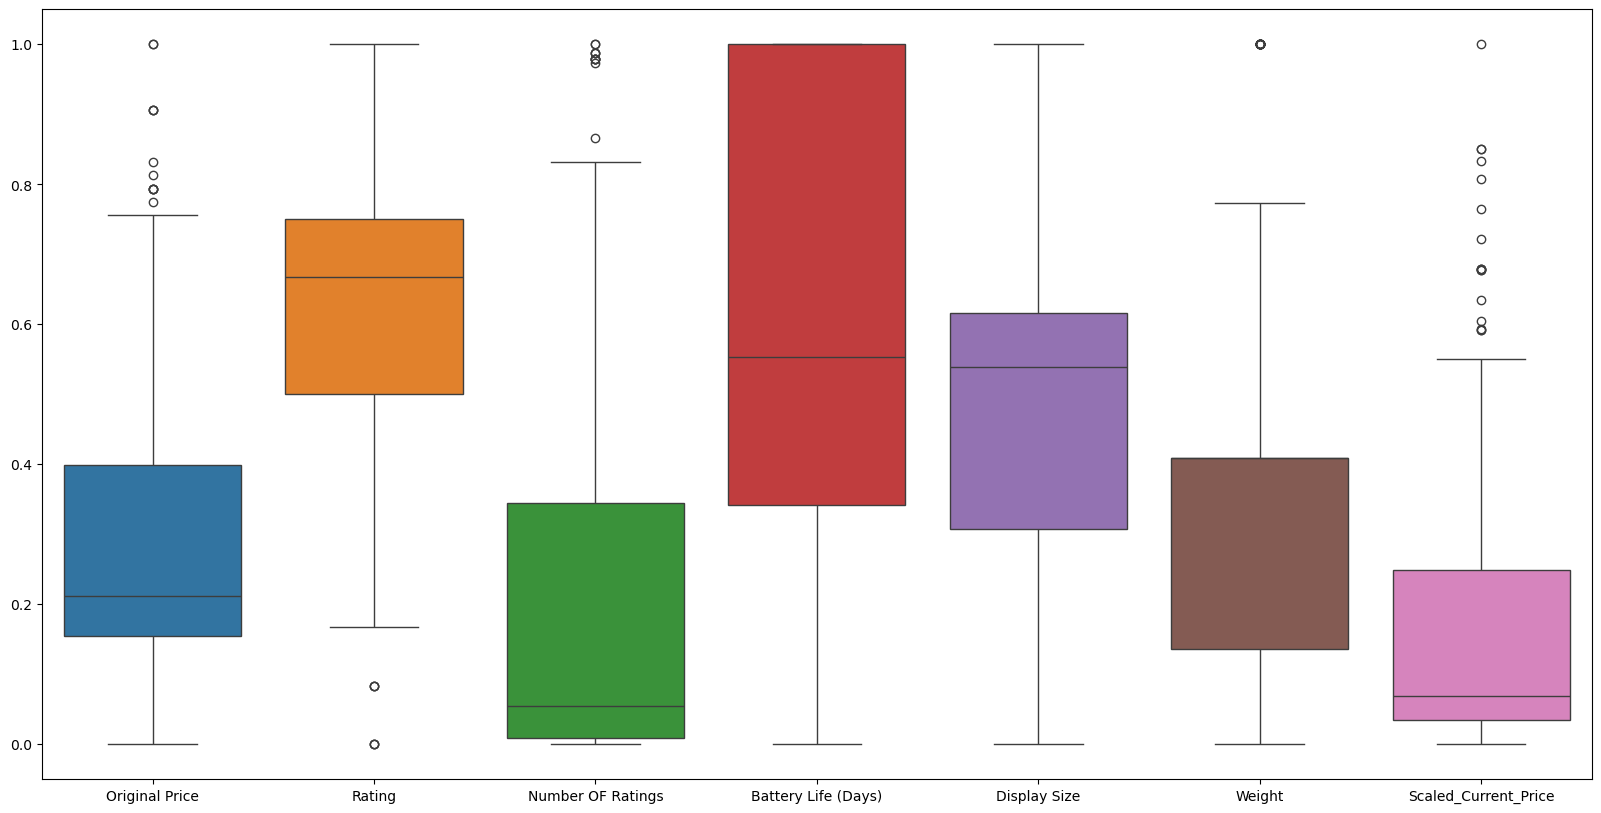

In [114]:
plt.figure(figsize=(20,10))
sns.boxplot(numerical_cols_scaled)

/tmp/ipykernel_5694/41993691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical_cols_scaled['Weight'])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

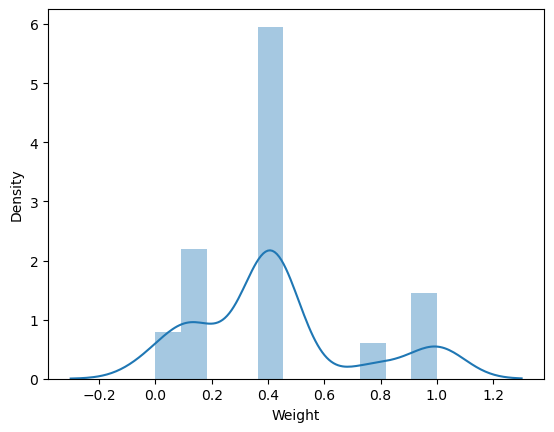

In [107]:
sns.distplot(numerical_cols_scaled['Weight'])

In [94]:
y = train_df['Discount Price']

In [102]:
y

0     -13200.000001
1      -5991.000000
2     -18200.000000
3      -3400.000000
4      -2500.000000
           ...     
176    -2000.000000
177    -2700.000000
178       -2.000000
179    -6000.000000
180    -6000.000000
Name: Discount Price, Length: 181, dtype: float64

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numerical_cols_scaled, y, test_size=0.2, random_state=42)

In [116]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((144, 7), (37, 7), (144,), (37,))

In [117]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [118]:
lr.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = lr.predict(X_test)

In [120]:
y_pred

array([ -5991.00000007,  -2699.99999991,  -3999.99999999,  -6491.00000012,
         -999.9999999 ,  -2999.99999997,  -4541.00000002,  -2999.9999999 ,
        -5000.00000001,  -5000.00000019,  -8952.00000012,  -1999.99999993,
        -5000.00000004,  -2999.99999992,  -2199.99999993,  -5991.00000007,
        -7500.00000019,  -1996.00000023, -11491.00000031,  -8200.00000002,
        -8991.00000027, -10000.0000003 ,  -3300.00000011,  -7000.00000007,
        -4000.00000001,  -1999.99999988, -16500.00000042,  -5191.00000005,
        -4000.00000003,  -1999.99999995,  -5000.00000018,  -9500.00000023,
        -1199.99999991,  -5000.00000003,  -3500.00000006,   2500.0000001 ,
        -6000.00000018])

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [122]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.467185140631045e-07

In [123]:
mse = mean_squared_error(y_test, y_pred)
mse

1.5328129828910335e-13

In [124]:
score = r2_score(y_test, y_pred)
score

1.0

In [125]:
# Result is Overfitting

In [128]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_score = r2_score(y_test, ridge_pred)

print("Mean Absolute Error :", ridge_mae)
print("Score :", ridge_score)

Mean Absolute Error : 1178.6519507932953
Score : 0.7548202670830406


In [129]:
from sklearn.linear_model import Lasso

ridge = Lasso()
ridge.fit(X_train, y_train)
lasso_pred = ridge.predict(X_test)
laso_mae = mean_absolute_error(y_test, lasso_pred)
laso_score = r2_score(y_test, lasso_pred)

print("Mean Absolute Error :", laso_mae)
print("Score :", laso_score)

Mean Absolute Error : 15.240104712903184
Score : 0.9999597402318194
